In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#ETH and WBETH combined order book data
prices = pd.read_csv('order_book_data/merged_data/1min/eth_wbeth_combined_1m.csv', index_col=0, parse_dates=True)

#BTC and WBTC combined order book data
#prices = pd.read_csv('order_book_data/merged_data/1min/btc_wbtc_combined_1m.csv', index_col=0, parse_dates=True)

In [23]:
prices

,eth_mid_price,eth_ask_price,eth_bid_price,eth_ask_amount,eth_bid_amount,wbeth_mid_price,wbeth_ask_price,wbeth_bid_price,wbeth_ask_amount,wbeth_bid_amount
local_timestamp,,,,,,,,,,
2024-06-01 00:00:00,3765.885,3765.89,3765.88,51.4959,8.3680,3916.525,3916.53,3916.52,0.0988,0.0037
2024-06-01 00:01:00,3763.005,3763.01,3763.00,53.8655,10.1998,3912.750,3914.47,3911.03,0.1684,0.0127
2024-06-01 00:02:00,3764.515,3764.52,3764.51,12.6084,13.1216,3915.350,3915.42,3915.28,0.0025,0.0029
2024-06-01 00:03:00,3765.815,3765.82,3765.81,49.6716,6.8205,3916.765,3917.23,3916.30,0.0586,0.0127
2024-06-01 00:04:00,3766.675,3766.68,3766.67,4.0122,42.2719,3918.100,3918.32,3917.88,0.0435,0.0160
...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,3341.735,3341.74,3341.73,15.3455,52.3086,3534.665,3535.72,3533.61,0.1147,0.0340
2024-12-31 23:56:00,3340.645,3340.65,3340.64,15.2415,11.0570,3533.665,3534.77,3532.56,0.1147,0.7700
2024-12-31 23:57:00,3339.345,3339.35,3339.34,26.2239,4.9053,3532.305,3533.44,3531.17,0.1147,0.7974


In [24]:
prices.columns

Index(['eth_mid_price', 'eth_ask_price', 'eth_bid_price', 'eth_ask_amount',
       'eth_bid_amount', 'wbeth_mid_price', 'wbeth_ask_price',
       'wbeth_bid_price', 'wbeth_ask_amount', 'wbeth_bid_amount'],
      dtype='object')

In [25]:
sym1, S1_ask_price, S1_bid_price,S1_ask_amount,S1_bid_amount,sym2,S2_ask_price, S2_bid_price,S2_ask_amount,S2_bid_amount  = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")

#Gather relevant columns from order book data
#-------------------------------------------
S1_mid_price = prices[sym1]
S2_mid_price = prices[sym2]
#-------------------------------------------
S1_ask_price = prices[S1_ask_price]
S1_ask_amount = prices[S1_ask_amount]
S1_bid_price = prices[S1_bid_price]
S1_bid_amount = prices[S1_bid_amount]
#-------------------------------------------
S2_ask_price = prices[S2_ask_price]
S2_ask_amount = prices[S2_ask_amount]
S2_bid_price = prices[S2_bid_price]
S2_bid_amount = prices[S2_bid_amount]
#-------------------------------------------


Testing strategy on pair: eth_mid_price and wbeth_mid_price ...


In [26]:
S1_mid_price

local_timestamp
2024-06-01 00:00:00    3765.885
2024-06-01 00:01:00    3763.005
2024-06-01 00:02:00    3764.515
2024-06-01 00:03:00    3765.815
2024-06-01 00:04:00    3766.675
                         ...   
2024-12-31 23:55:00    3341.735
2024-12-31 23:56:00    3340.645
2024-12-31 23:57:00    3339.345
2024-12-31 23:58:00    3338.415
2024-12-31 23:59:00    3337.785
Name: eth_mid_price, Length: 308051, dtype: float64

In [27]:
S2_ask_price.min()

np.float64(2189.37)

In [28]:
S2_bid_price.min()

np.float64(2167.07)

In [29]:
S2_mid_price

local_timestamp
2024-06-01 00:00:00    3916.525
2024-06-01 00:01:00    3912.750
2024-06-01 00:02:00    3915.350
2024-06-01 00:03:00    3916.765
2024-06-01 00:04:00    3918.100
                         ...   
2024-12-31 23:55:00    3534.665
2024-12-31 23:56:00    3533.665
2024-12-31 23:57:00    3532.305
2024-12-31 23:58:00    3531.890
2024-12-31 23:59:00    3530.340
Name: wbeth_mid_price, Length: 308051, dtype: float64

# Slippage 
---

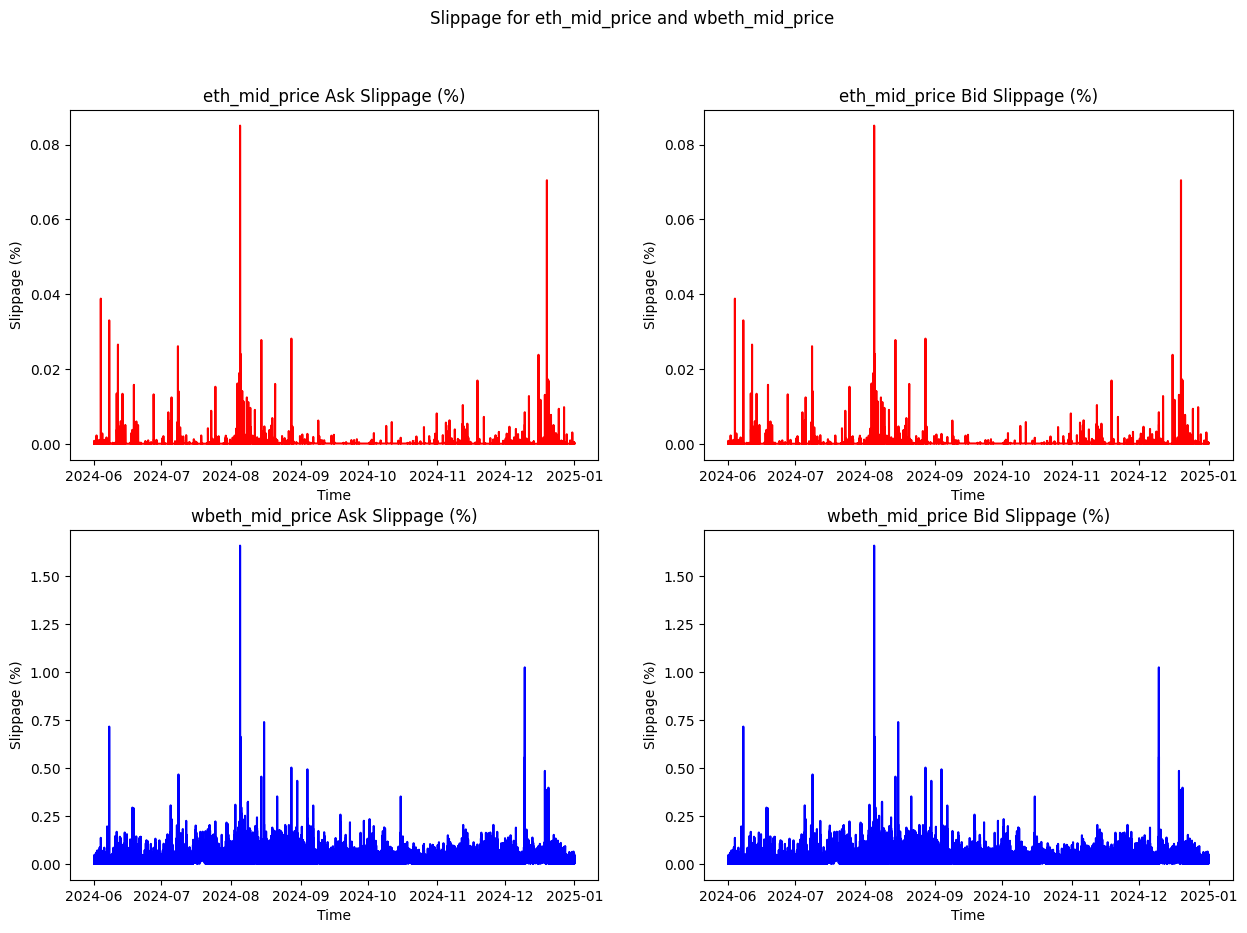

In [30]:
#Compute percentage slippage

S1_ask_slippage_percentage = (S1_ask_price - S1_mid_price) / S1_mid_price * 100
S1_bid_slippage_percentage = (S1_mid_price - S1_bid_price) / S1_mid_price * 100
S2_ask_slippage_percentage = (S2_ask_price - S2_mid_price) / S2_mid_price * 100
S2_bid_slippage_percentage = (S2_mid_price - S2_bid_price) / S2_mid_price * 100

#Plot slippage on subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f"Slippage for {sym1} and {sym2}")
axs[0, 0].plot(S1_ask_slippage_percentage, color='red')
axs[0, 0].set_title(f'{sym1} Ask Slippage (%)')
axs[0, 0].set_ylabel('Slippage (%)')
axs[0, 0].set_xlabel('Time')
axs[0, 1].plot(S1_bid_slippage_percentage, color='red')
axs[0, 1].set_title(f'{sym1} Bid Slippage (%)')
axs[0, 1].set_ylabel('Slippage (%)')
axs[0, 1].set_xlabel('Time')
axs[1, 0].plot(S2_ask_slippage_percentage, color='blue')
axs[1, 0].set_title(f'{sym2} Ask Slippage (%)')
axs[1, 0].set_ylabel('Slippage (%)')
axs[1, 0].set_xlabel('Time')
axs[1, 1].plot(S2_bid_slippage_percentage, color='blue')
axs[1, 1].set_title(f'{sym2} Bid Slippage (%)')
axs[1, 1].set_ylabel('Slippage (%)')
axs[1, 1].set_xlabel('Time')
plt.show()

#Logic of formulas used above:
#The ask price is the lowest price at which sellers are willing to sell, while the bid price is the highest price that buyers are willing to pay. Since sellers want to get a good price, their ask is naturally higher than what buyers are willing to pay, and buyers want to pay as little as possible, so their bid is lower. The mid price is typically calculated as the average of the bid and ask, so it lies between the two. This is why, by definition, the ask is above the mid and the bid is below the mid.



In [31]:
average_S1_ask_slippage_percentage = S1_ask_slippage_percentage.mean()
average_S1_bid_slippage_percentage = S1_bid_slippage_percentage.mean()
average_S2_ask_slippage_percentage = S2_ask_slippage_percentage.mean()
average_S2_bid_slippage_percentage = S2_bid_slippage_percentage.mean()

print(f"Average {sym1} Ask Slippage: {average_S1_ask_slippage_percentage:.2f}%")
print(f"Average {sym1} Bid Slippage: {average_S1_bid_slippage_percentage:.2f}%")
print(f"Average {sym2} Ask Slippage: {average_S2_ask_slippage_percentage:.2f}%")
print(f"Average {sym2} Bid Slippage: {average_S2_bid_slippage_percentage:.2f}%")

Average eth_mid_price Ask Slippage: 0.00%
Average eth_mid_price Bid Slippage: 0.00%
Average wbeth_mid_price Ask Slippage: 0.03%
Average wbeth_mid_price Bid Slippage: 0.03%


In [32]:
S2_ask_price

local_timestamp
2024-06-01 00:00:00    3916.53
2024-06-01 00:01:00    3914.47
2024-06-01 00:02:00    3915.42
2024-06-01 00:03:00    3917.23
2024-06-01 00:04:00    3918.32
                        ...   
2024-12-31 23:55:00    3535.72
2024-12-31 23:56:00    3534.77
2024-12-31 23:57:00    3533.44
2024-12-31 23:58:00    3532.86
2024-12-31 23:59:00    3531.75
Name: wbeth_ask_price, Length: 308051, dtype: float64

In [33]:
S2_bid_price

local_timestamp
2024-06-01 00:00:00    3916.52
2024-06-01 00:01:00    3911.03
2024-06-01 00:02:00    3915.28
2024-06-01 00:03:00    3916.30
2024-06-01 00:04:00    3917.88
                        ...   
2024-12-31 23:55:00    3533.61
2024-12-31 23:56:00    3532.56
2024-12-31 23:57:00    3531.17
2024-12-31 23:58:00    3530.92
2024-12-31 23:59:00    3528.93
Name: wbeth_bid_price, Length: 308051, dtype: float64

In [34]:
S1_bid_slippage_percentage

local_timestamp
2024-06-01 00:00:00    0.000133
2024-06-01 00:01:00    0.000133
2024-06-01 00:02:00    0.000133
2024-06-01 00:03:00    0.000133
2024-06-01 00:04:00    0.000133
                         ...   
2024-12-31 23:55:00    0.000150
2024-12-31 23:56:00    0.000150
2024-12-31 23:57:00    0.000150
2024-12-31 23:58:00    0.000150
2024-12-31 23:59:00    0.000150
Length: 308051, dtype: float64

# Spreads
---

In [35]:
# #Calculate average spread for each asset

# #Calculate percent average spread for each asset

# # S1_average_spread_percentage = ((S1_ask_price - S1_bid_price) / S1_mid_price).mean() * 100
# # S2_average_spread_percentage = ((S2_ask_price - S2_bid_price) / S2_mid_price).mean() * 100
# # print(f"Average spread for {sym1}: {S1_average_spread_percentage:.2f}%")


# S1_avg_spread = (S1_ask_price - S1_bid_price).mean()
# S2_avg_spread = (S2_ask_price - S2_bid_price).mean()
# print(f"Average spread for {sym1}: {S1_avg_spread}")
# print(f"Average spread for {sym2}: {S2_avg_spread}")

# #Plot average spread for each asset on a bar chart
# fig, ax = plt.subplots()
# ax.bar([sym1, sym2], [S1_avg_spread, S2_avg_spread], color=['green', 'red'])
# ax.set_title('Average Spread')
# ax.set_ylabel('Spread')
# plt.show()


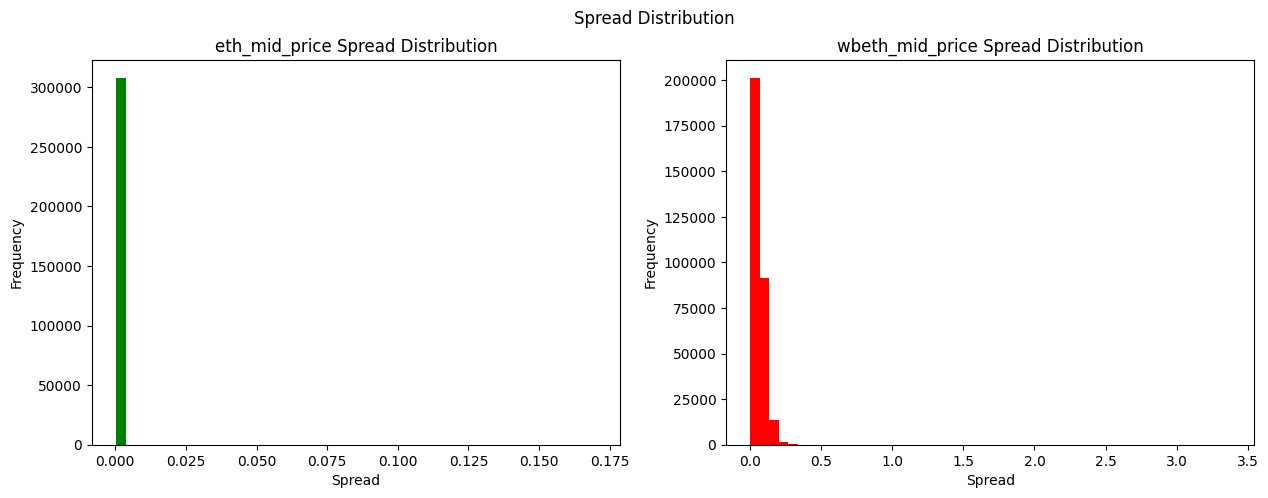

In [44]:
#Plot distribution of spread for each asset
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Spread Distribution')
axs[0].hist(((S1_ask_price - S1_bid_price)/S1_bid_price) *100, bins=50, color='green')
axs[0].set_title(f'{sym1} Spread Distribution')
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Spread')
axs[1].hist(((S2_ask_price - S2_bid_price)/S2_bid_price) * 100, bins=50, color='red')
axs[1].set_title(f'{sym2} Spread Distribution')
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Spread')
plt.show()

In [37]:
# #Plot distirbution of order book depth for each asset
# fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# fig.suptitle('Order Book Depth Distribution')
# axs[0, 0].hist(S1_ask_amount, bins=50, color='green')
# axs[0, 0].set_title(f'{sym1} Ask Amount Distribution')
# axs[0, 0].set_ylabel('Frequency')
# axs[0, 0].set_xlabel('Amount')
# axs[0, 1].hist(S1_bid_amount, bins=50, color='green')
# axs[0, 1].set_title(f'{sym1} Bid Amount Distribution')
# axs[0, 1].set_ylabel('Frequency')
# axs[0, 1].set_xlabel('Amount')
# axs[1, 0].hist(S2_ask_amount, bins=50, color='red')
# axs[1, 0].set_title(f'{sym2} Ask Amount Distribution')
# axs[1, 0].set_ylabel('Frequency')
# axs[1, 0].set_xlabel('Amount')
# axs[1, 1].hist(S2_bid_amount, bins=50, color='red')
# axs[1, 1].set_title(f'{sym2} Bid Amount Distribution')
# axs[1, 1].set_ylabel('Frequency')
# axs[1, 1].set_xlabel('Amount')
# plt.show()

# Liquidity
---

Average eth_mid_price Ask Liquidity: $92933.15
Average eth_mid_price Bid Liquidity: $90816.26
Average wbeth_mid_price Ask Liquidity: $435.39
Average wbeth_mid_price Bid Liquidity: $411.19


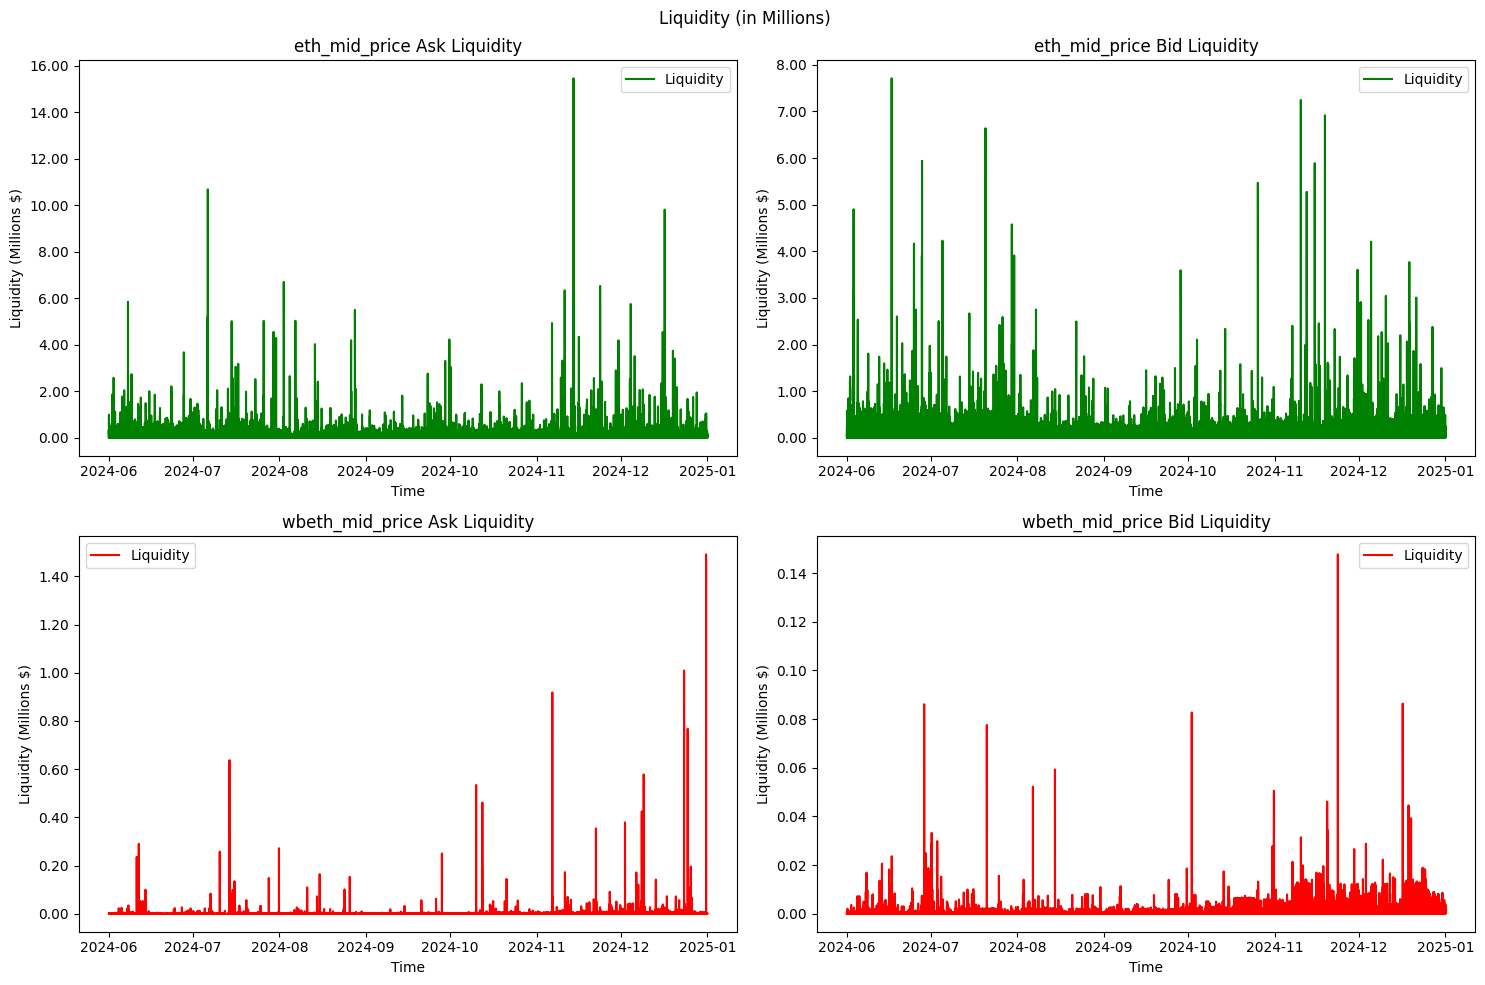

In [38]:
from matplotlib.ticker import FuncFormatter

# Calculate liquidity in nominal price units.
S1_ask_liquidity = S1_ask_price * S1_ask_amount
S1_bid_liquidity = S1_bid_price * S1_bid_amount
S2_ask_liquidity = S2_ask_price * S2_ask_amount
S2_bid_liquidity = S2_bid_price * S2_bid_amount

# Calculate the average liquidity for each series.
avg_S1_ask = S1_ask_liquidity.mean()
avg_S1_bid = S1_bid_liquidity.mean()
avg_S2_ask = S2_ask_liquidity.mean()
avg_S2_bid = S2_bid_liquidity.mean()

# Print the average liquidity for each asset.
print(f"Average {sym1} Ask Liquidity: ${avg_S1_ask:.2f}")
print(f"Average {sym1} Bid Liquidity: ${avg_S1_bid:.2f}")
print(f"Average {sym2} Ask Liquidity: ${avg_S2_ask:.2f}")
print(f"Average {sym2} Bid Liquidity: ${avg_S2_bid:.2f}")


# Define a formatter to display liquidity in millions.
def millions_formatter(x, pos):
    return f'{x/1e6:.2f}'

formatter = FuncFormatter(millions_formatter)

# Plot line charts of liquidity for each asset.
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Liquidity (in Millions)')

# Plot S1 Ask Liquidity
axs[0, 0].plot(S1_ask_liquidity, color='green', label='Liquidity')
axs[0, 0].set_title(f'{sym1} Ask Liquidity')
axs[0, 0].set_ylabel('Liquidity (Millions $)')
axs[0, 0].set_xlabel('Time')
axs[0, 0].yaxis.set_major_formatter(formatter)
axs[0, 0].legend()

# Plot S1 Bid Liquidity
axs[0, 1].plot(S1_bid_liquidity, color='green', label='Liquidity')
axs[0, 1].set_title(f'{sym1} Bid Liquidity')
axs[0, 1].set_ylabel('Liquidity (Millions $)')
axs[0, 1].set_xlabel('Time')
axs[0, 1].yaxis.set_major_formatter(formatter)
axs[0, 1].legend()

# Plot S2 Ask Liquidity
axs[1, 0].plot(S2_ask_liquidity, color='red', label='Liquidity')
axs[1, 0].set_title(f'{sym2} Ask Liquidity')
axs[1, 0].set_ylabel('Liquidity (Millions $)')
axs[1, 0].set_xlabel('Time')
axs[1, 0].yaxis.set_major_formatter(formatter)
axs[1, 0].legend()

# Plot S2 Bid Liquidity
axs[1, 1].plot(S2_bid_liquidity, color='red', label='Liquidity')
axs[1, 1].set_title(f'{sym2} Bid Liquidity')
axs[1, 1].set_ylabel('Liquidity (Millions $)')
axs[1, 1].set_xlabel('Time')
axs[1, 1].yaxis.set_major_formatter(formatter)
axs[1, 1].legend()

plt.tight_layout()
plt.show()
